In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Image resize
bg1 = cv2.imread('GreenBackground.png', 1)
bg2 = cv2.imread('NewBackground.jpg', 1)
obj = cv2.imread('Object.png', 1)
bg1_resized = cv2.resize(bg1, (678, 381))
bg2_resized = cv2.resize(bg2, (678, 381))
obj_resized = cv2.resize(obj, (678, 381))

In [3]:
# Tách object ra khỏi nền
def compute_difference(bg, obj):
    difference = cv2.absdiff(bg, obj)
    difference_gray = np.sum(difference, axis=2) / 3.0
    return difference_gray.astype(np.uint8)

In [4]:
# Tạo ảnh nhị phân
def binary_mask(img):
  img = np.where(img > 10, 255, 0)
  img = np.stack((img,)*3, axis=-1)
  return img.astype(np.uint8)

In [5]:
# Chuyển đỗi background cho ảnh
def change_background(bg, obj, mask):
    _obj = compute_difference(mask, obj)
    _obj = binary_mask(_obj)
    output = np.where(obj == 255, bg, obj)
    return output

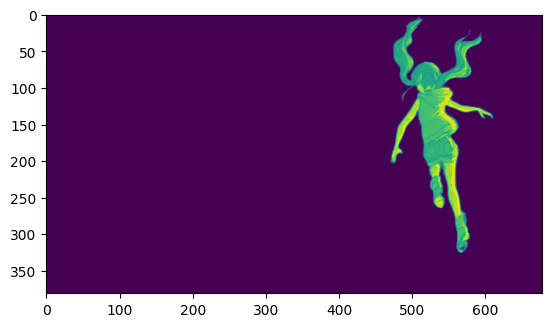

In [6]:
img = compute_difference(bg1_resized, obj_resized)
plt.imshow(img)

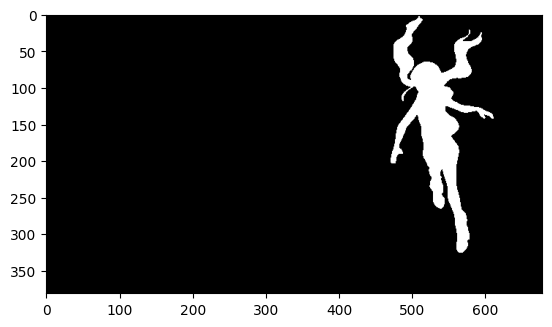

In [7]:
plt.imshow(binary_mask(img))

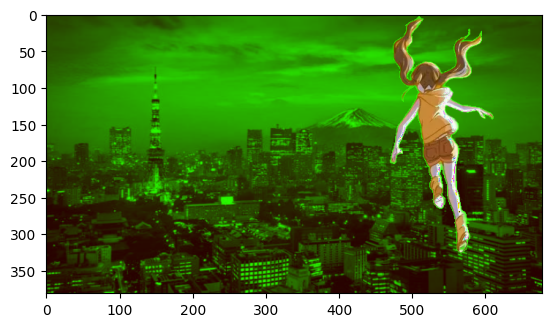

In [8]:
plt.imshow(change_background(bg2_resized, obj_resized, bg1_resized))